# Scikit-Learn Tutorial

In this Tutorial, we introduce the basics of the machine learning scikit-learn package (http://scikit-learn.org). This package is the main tool we will use throughout this Tutorial. Its clean API makes it easy to define, train, and test models.

We will show here a basic example of linear regression in the context of curve fitting. This toy example will allow us to illustrate key concepts such as linear models, overfitting, underfitting, regularization, and cross-validation.

We will generate a one-dimensional dataset with a simple model (including some noise), and we will try to fit a function to this data. With this function, we can predict values on new data points. This is a curve fitting regression problem.

In [38]:
import numpy as np
import scipy.stats as st
import sklearn.linear_model as lm
import matplotlib.pyplot as plt
%matplotlib inline

  We now define a nonlinear function:

In [39]:
def f(x):
    return np.exp(3 * x)

We generate the values along the curve on [0,2].

In [40]:
x_tr = np.linspace(0., 2, 200)
y_tr = f(x_tr)

Now, let's generate data points within [0,1]. We use the function f and we add some Gaussian noise.

In [71]:
x = np.array([0, .1, .3, .7, 1.1, 1.4, 1.9])
y = f(x) + 20 * np.random.randn(len(x))

(-200, 400)

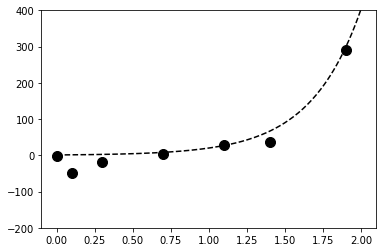

In [114]:
# fig, ax = plt.subplots(1, 1, figsize=(6, 3))
plt.plot(x_tr, y_tr, '--k')
plt.plot(x, y, 'ok', ms=10)
ax = plt.gca()
ax.set_ylim([-200, 400])

## Linear Regression

Now, we use scikit-learn to fit a linear model to the data. There are three steps. First, we create the model (an instance of the LinearRegression class). Then, we fit the model to our data. Finally, we predict values from our trained model.

In [73]:
# We create the model.
lr = lm.LinearRegression()
# We train the model on our training dataset.
lr.fit(x.reshape(len(x), 1), y)
# Now, we predict points with our trained model.
y_lr = lr.predict(x_tr.reshape(len(x_tr), 1))

We need to convert x and x_tr to column vectors, as it is a general convention in scikit-learn that observations are rows, while features are columns. Here, we have seven observations with one feature.

(-200, 400)

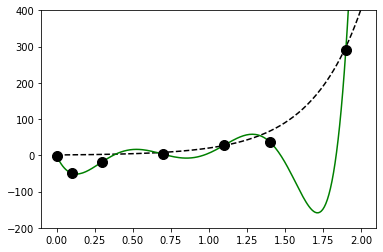

In [115]:
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
ax = plt.gca()
ax.set_ylim([-200, 400])

## Polynomial Regression

 The linear fit is not well-adapted here, as the data points are generated according to a nonlinear model (an exponential curve). Therefore, we are now going to fit a nonlinear model. More precisely, we will fit a polynomial function to our data points. We can still use linear regression for this, by precomputing the exponents of our data points. 

In [75]:
from sklearn.preprocessing import PolynomialFeatures

In [118]:
degree = 2
poly = PolynomialFeatures(degree)

In [119]:
print(x.reshape(len(x), 1))

[[0. ]
 [0.1]
 [0.3]
 [0.7]
 [1.1]
 [1.4]
 [1.9]]


In [120]:
x_poly = poly.fit_transform(x.reshape(len(x), 1))
x_tr_poly = poly.fit_transform(x_tr.reshape(len(x_tr), 1))

In [121]:
print(x_poly)

[[1.   0.   0.  ]
 [1.   0.1  0.01]
 [1.   0.3  0.09]
 [1.   0.7  0.49]
 [1.   1.1  1.21]
 [1.   1.4  1.96]
 [1.   1.9  3.61]]


In [122]:
lr = lm.LinearRegression()

lr.fit(x_poly , y)

y_lr = lr.predict(x_tr_poly)

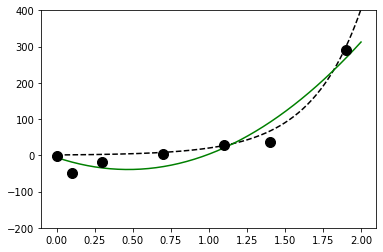

In [123]:
plt.plot(x_tr, y_tr, '--k')
plt.plot(x_tr, y_lr, 'g')
plt.plot(x, y, 'ok', ms=10)
ax = plt.gca()
ax.set_ylim([-200, 400])
plt.show()

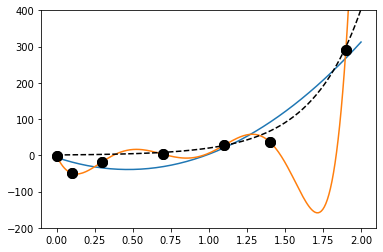

In [124]:
for degree in [2, 7]:
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x.reshape(len(x), 1))
    x_tr_poly = poly.fit_transform(x_tr.reshape(len(x_tr), 1))
    lr = lm.LinearRegression()
    lr.fit(x_poly , y)
    y_lr = lr.predict(x_tr_poly)
    plt.plot(x_tr, y_lr)
    plt.plot(x, y, 'ok', ms=10)
plt.plot(x_tr, y_tr, '--k')
ax = plt.gca()
ax.set_ylim([-200, 400])
plt.show()

We have fitted two polynomial models of degree 2 and 7. The degree 2 polynomial appears to fit the data points less precisely than the degree 7 polynomial. However, it seems more robust; the degree 7 polynomial seems really bad at predicting values outside the data points (look for example at the x≥1 portion). This is what we call overfitting; by using a too-complex model, we obtain a better fit on the trained dataset, but a less robust model outside this set.

## Regularizaion

We will now use a different learning model called ridge regression. It works like linear regression except that it prevents the polynomial's coefficients from becoming too big. This is what happened in the previous example. By adding a regularization term in the loss function, ridge regression imposes some structure on the underlying model. We will see more details in the next section.

The ridge regression model has a meta-parameter, which represents the weight of the regularization term. We could try different values with trial and error using the Ridge class. However, scikit-learn provides another model called RidgeCV, which includes a parameter search with cross-validation. In practice, this means that we don't have to tweak this parameter by hand—scikit-learn does it for us. As the models of scikit-learn always follow the fit-predict API, all we have to do is replace lm.LinearRegression() with lm.RidgeCV() in the previous code. We will give more details in the next section.

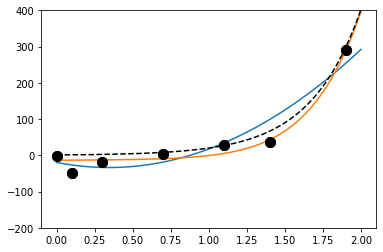

In [126]:
for degree in [2, 7]:
    poly = PolynomialFeatures(degree)
    x_poly = poly.fit_transform(x.reshape(len(x), 1))
    x_tr_poly = poly.fit_transform(x_tr.reshape(len(x_tr), 1))
    lr = lm.RidgeCV()
    lr.fit(x_poly , y)
    y_lr = lr.predict(x_tr_poly)
    plt.plot(x_tr, y_lr)
    plt.plot(x, y, 'ok', ms=10)
plt.plot(x_tr, y_tr, '--k')
ax = plt.gca()
ax.set_ylim([-200, 400])
plt.show()